<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/Example_12_10_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 5.0 MB/s eta 0:00:00


In [3]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback, ss
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define your plant in phase variable form:
A = np.array([[0, 1],[-3, -5]])
B = np.array([[0],[1]])
C = np.array([1, 0])
D = np.array([0])

sys = ss(A,B,C,D)
print(sys)
print(tf(sys))

<StateSpace>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [-3. -5.]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]

<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      1
-------------
s^2 + 5 s + 3



2001


<ipython-input-25-5352b68c052d>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yplt[i] = y


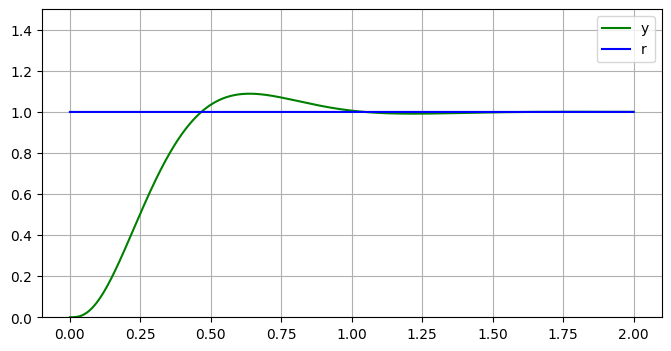

In [25]:
# PI controller parameters to get 10% overshot and Ts = 1 sec
kp = 203.8
ki = 916
kd = 23

x = np.array([[0],[0]])#np.zeros((A.shape[0], 1))
u = 0
r = 1

# simulate
t0 = 0
t1 = 2           # remeber that Ts is 1 sec
dt = 0.001
nt = int( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)
er_sum = 0
last_y = 0

print(t.shape[0])
rplt = np.zeros(t.shape[0])
yplt = np.zeros(t.shape[0])

for i in range(t.shape[0]):
  # model
  xdot = np.dot(A, x) + B * u        #state equation
  x = x + xdot * dt
  y = np.dot(C,x)+ D * u             # output equation

  e = r - y                    # integral coontrol
  er_sum = er_sum + e * dt
  u = ki * er_sum - kp * y - kd * (y - last_y)/dt
  last_y = y

  yplt[i] = y
  rplt[i] = r

# plot results
plt.figure(figsize=(8, 4))
plt.plot(t, yplt, 'green')
plt.plot(t, rplt, 'blue')
plt.ylim(0, 1.5)
plt.grid()
plt.legend(['y','r'])
plt.show()

Eigenvalues (Roots) of A: [-1.15+1.57082781j -1.15-1.57082781j]
Eigenvalues (Roots) of A: [-11.515+15.70206276j -11.515-15.70206276j]


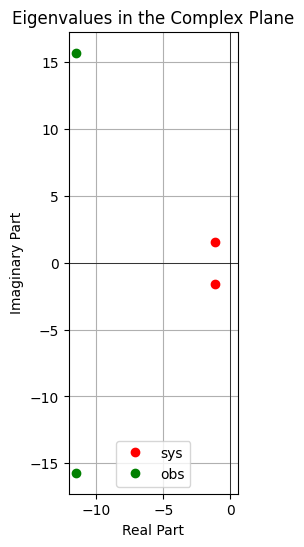

In [ ]:
# plot roots (eigenvalues) of the system matrix of controlled system and observer
sys_eigenvalues, _ = np.linalg.eig(A-np.outer(B, K))

print("Eigenvalues (Roots) of A:", sys_eigenvalues)

obs_eigenvalues, _ = np.linalg.eig(A-np.outer(L, C))

print("Eigenvalues (Roots) of A:", obs_eigenvalues)

plt.figure(figsize=(10, 6))
# Plot the real part vs. the imaginary part of the eigenvalues
plt.plot(sys_eigenvalues.real, sys_eigenvalues.imag, 'ro')  # 'ro' plots red dots
plt.plot(obs_eigenvalues.real, obs_eigenvalues.imag, 'go')  # 'ro' plots red dots

# Add grid, labels, and make sure the aspect ratio is equal
plt.grid(True)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues in the Complex Plane')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['sys','obs'])

# Show the plot
plt.show()
